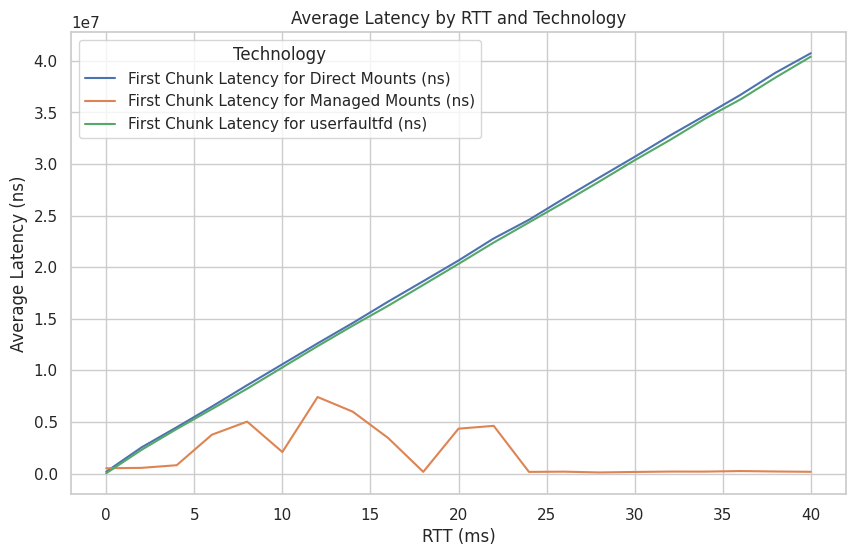

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('../bench/latency-first-chunk-rttvar/results.csv')

# Forward fill the missing RTT values
data['RTT (ms)'].fillna(method='ffill', inplace=True)

# Convert the RTT values to integers for easier comparison and plotting
data['RTT (ms)'] = data['RTT (ms)'].str.rstrip('ms').astype(int)

# Reshape the data so that each row contains RTT, technology, and latency
data_melted = data.melt(id_vars='RTT (ms)', var_name='Technology', value_name='Latency (ns)')

# Group by RTT and technology, and calculate the average latency
average_latency = data_melted.groupby(['RTT (ms)', 'Technology'])['Latency (ns)'].mean().reset_index()

# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a line plot
sns.lineplot(data=average_latency, x='RTT (ms)', y='Latency (ns)', hue='Technology', ax=ax)

# Set the title and labels of the plot
ax.set_title('Average Latency by RTT and Technology')
ax.set_xlabel('RTT (ms)')
ax.set_ylabel('Average Latency (ns)')

# Show the plot
plt.show()